In [2]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
import os

Face Pattern Recognition

In [ ]:
#Define image to work with
img_path="Images/big_group_photo.jpg"
img = cv2.imread(img_path)
#Select the model to be used for detection varying the list index
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
faces = DeepFace.extract_faces(img_path, detector_backend=detectors[4])
facesCoordinatesList=[]

In [4]:
#Extract only the coordinates features
print("Number of detected faces : " + str(len(faces)))
for i in range(len(faces)):
    facesCoordinatesList.append(faces[i]["facial_area"])
for element in facesCoordinatesList:
    cv2.rectangle(img, (element["x"], element["y"]),(element["x"] + element["w"], element["y"] + element["h"]), (73, 32, 238), 5)

Number of detected faces : 1


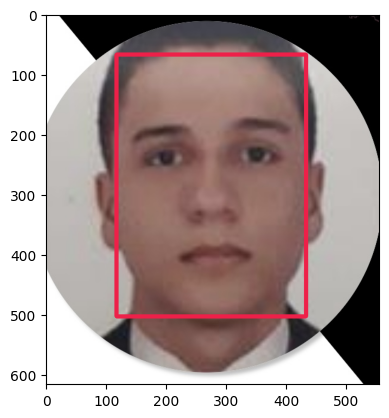

In [5]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Facial recognition and metrics about position of facial features

In [12]:
#objRecognition

student_name="YordiRochel"
student_photo_path=rf"C:\Users\User\Desktop\FinalProject\ImagesDeepface\Students\{student_name}.jpeg"
classroomFolder=r"C:\Users\User\Desktop\FinalProject\ImagesDeepface\RealClassroomPhotos"


model="Dlib"
output_folder = rf"C:\Users\User\Desktop\FinalProject\ImagesDeepface\StudentFoundInClassroom{model}"
os.makedirs(output_folder, exist_ok=True)


# Iterate through classroom images
for i, file in enumerate(os.listdir(classroomFolder), start=1):
    try:
        # Full path to classroom image
        classroomFolderImage = os.path.join(classroomFolder, file)
        
        # Perform face verification
        result = DeepFace.verify(
            img1_path=student_photo_path,
            img2_path=classroomFolderImage,
            model_name=model,
            detector_backend="mtcnn"
        )
        
        # Read the classroom (group) image
        image = cv2.imread(classroomFolderImage)
        
        # If verification is successful, detect and draw on the matching face
        if result['verified']:
            # Find the matching face
            faces = DeepFace.extract_faces(
                img_path=classroomFolderImage, 
                detector_backend="mtcnn", 
                enforce_detection=True
            )
            
            # If faces are detected
            if faces:
                # Take the first matching face (most likely the correct one)
                face = faces[0]['facial_area']
                
                # Draw red rectangle on the matching face
                cv2.rectangle(
                    image, 
                    (face['x'], face['y']), 
                    (face['x'] + face['w'], face['y'] + face['h']), 
                    (0, 0, 255),  # Red color in BGR
                    2  # Thickness of the rectangle border
                )
                
                # Optional: Add verification text
                label = f"Verified: {result['verified']} (Distance: {result['distance']:.2f})"
                cv2.putText(
                    image, 
                    label, 
                    (face['x'], face['y'] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0, 0, 255), 
                    1
                )
        
        # Generate output filename
        output_filename = f"{student_name}_Found_in_classroom_{i}.jpg"
        output_path = os.path.join(output_folder, output_filename)
        
        # Save annotated image
        cv2.imwrite(output_path, image)
        
        # Print verification result
        print(f"Verification result for {file}: {result['verified']}")
        print(f"Similarity: {result['distance']}")
        print(f"Saved annotated image to: {output_path}")
        print("---")
    
    except Exception as e:
        print(f"Error processing {file}: {str(e)}")
        continue

Verification result for classroom1.jpg: True
Similarity: 0.057285816124204136
Saved annotated image to: C:\Users\User\Desktop\FinalProject\ImagesDeepface\StudentFoundInClassroomDlib\YordiRochel_Found_in_classroom_1.jpg
---
Verification result for classroom10.jpg: True
Similarity: 0.06272972970041668
Saved annotated image to: C:\Users\User\Desktop\FinalProject\ImagesDeepface\StudentFoundInClassroomDlib\YordiRochel_Found_in_classroom_2.jpg
---
Verification result for classroom11.jpg: True
Similarity: 0.06519430885518207
Saved annotated image to: C:\Users\User\Desktop\FinalProject\ImagesDeepface\StudentFoundInClassroomDlib\YordiRochel_Found_in_classroom_3.jpg
---
Verification result for classroom12.jpg: False
Similarity: 0.07103621152209427
Saved annotated image to: C:\Users\User\Desktop\FinalProject\ImagesDeepface\StudentFoundInClassroomDlib\YordiRochel_Found_in_classroom_4.jpg
---
Verification result for classroom13.jpg: False
Similarity: 0.07070552844127587
Saved annotated image to: C:

Mathematical metrics for analizing facial similarity

In [4]:
from scipy.spatial.distance import euclidean,cosine

#Obtain the analysis of the image
embedding1=DeepFace.represent(img_path="single2.jpeg",model_name="ArcFace", detector_backend="retinaface")
embedding2=DeepFace.represent(img_path="single11.jpeg",model_name="ArcFace", detector_backend="retinaface")

#Extract the multi-dimensional vector only
embedding1Vector1=np.array(embedding1[0]["embedding"])
embedding1Vector2=embedding2[0]["embedding"]

def cosine_similarity(embedding1, embedding2):
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

print("Cosine similarity is "+ str(cosine_similarity(embedding1Vector1,embedding1Vector2)))

def euclidean_distance(embedding1,embedding2):
    return euclidean(embedding1,embedding2)

print("Euclidean distance is "+ str(euclidean_distance(embedding1Vector1,embedding1Vector2)))



Cosine similarity is 0.35477153678865364
Euclidean distance is 3.8419692767006404
